# CAC3: Image Reconition | Classification of 3 Different Exercises: Push Ups, Hand stands, Crunches

Name: **Krish Agarwal** <br>
Reg No: **21112016** <br>
Class: **4BSc DS A** <br>

---------------

## **About the Project**  
The project aims to classify images of hand-stands, push-ups, and crunches using image recognition techniques. The project involves several stages, including pre-processing, data preparation, and model training.  <br><br>
To begin with, the images are pre-processed to ensure that they are of uniform size, format, and resolution. The pre-processing stage involves several steps, including resizing, normalization, and conversion to grayscale.  <br><br>
For training the model, I have used various deep learning libraries such as TensorFlow and Keras. We have also utilized the YOLO (You Only Look Once) algorithm, which is a state-of-the-art object detection algorithm that uses convolutional neural networks (CNNs) to detect and classify objects in real-time.  <br><br>
In addition, I have used various pre-trained models, such as DarkNet, to speed up the training process and achieve higher accuracy. I have also utilized various data augmentation techniques, such as cropping to increase the diversity of the training data and improve the model's generalization capabilities.  <br><br>
The project also involves the use of various Python libraries, such as NumPy, OpenCV, and OS, to manage the image data, manipulate and preprocess the images, and visualize the results.

## **Problem Definition**:  
Classification between Push Ups, Hand stands and Crunches using Image Classification.

## **Approach/Method**:  
1. The images were loaded onto python.  
2. The images were renamed according to the classes and were brought to a common format - jpg.  
3. The people inside the images were cropped out using YOLO v5 Object Detection algorithm.  
4. The cropped images were then turned to grayscale images.  
5. The images at the last stage were reshaped to 300x300 pixels.  
6. After the pre-processing stage, the images were trained on a CNN model.

## **Results**:  
This project demonstrates the application of image recognition techniques in classifying images of hand-stands, push-ups, and crunches. The project involves several stages, including pre-processing, data preparation, and model training, and uses various deep learning libraries, pre-trained models, and data augmentation techniques to achieve higher accuracy and improve the model's generalization capabilities.

## References:  
- StackOverflow
- GeekforGeeks
- GitHub
- TutorialsPoint
- Medium
- W3School  
- Mr.Eapen

## **Code**:

### Importing Libraries

In [1]:
# importing all the necessary libraries/moduels
import glob
import cv2
import sys
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
import os
from functools import partial
from multiprocessing.pool import Pool
import numpy as np
import re
from datetime import timedelta
import time
from sklearn.model_selection import train_test_split
import pandas as pd
from PIL import Image
import numpy as np
import csv
import random

### Importing images

In [2]:
# Importing all the images related to crunches
crunches = [cv2.imread(file) for file in glob.glob("D:/Z/CU/SEM4/Machine Learning/CIA/3/Teachable Machine/Crunches/*.jpg")]

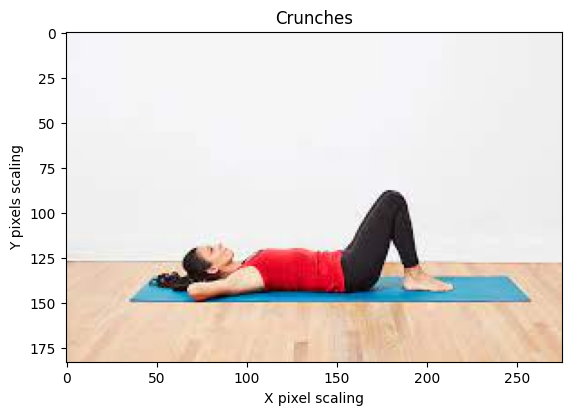

In [3]:
# Viewing a 'crunches' image
plt.title("Crunches")
plt.xlabel("X pixel scaling")
plt.ylabel("Y pixels scaling")
 
image = crunches[0] # Selecting the 1st image from all the cruches images
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) # Printing the image in RGB format
plt.show()

In [4]:
# Importing all the images related to hand stands
hand_stands = [cv2.imread(file) for file in glob.glob("D:/Z/CU/SEM4/Machine Learning/CIA/3/Teachable Machine/HandStands/*.jpg")]

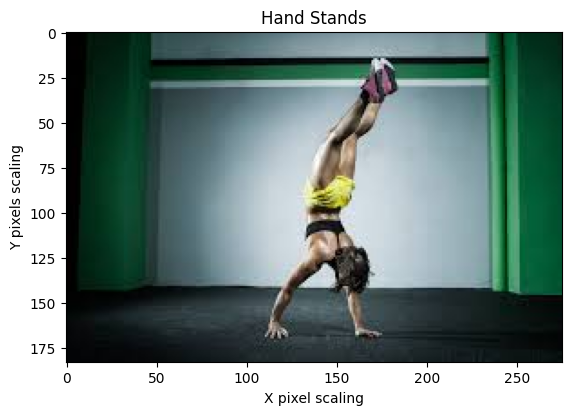

In [5]:
# Viewing a 'hand stand' image
plt.title("Hand Stands")
plt.xlabel("X pixel scaling")
plt.ylabel("Y pixels scaling")
 
image = hand_stands[0] # Selecting the 1st image from all the hand stand images
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) # Printing the image in RGB format
plt.show()

In [6]:
# Importing all the images related to planks
planks = [cv2.imread(file) for file in glob.glob("D:/Z/CU/SEM4/Machine Learning/CIA/3/Teachable Machine/Planks/*.jpg")]

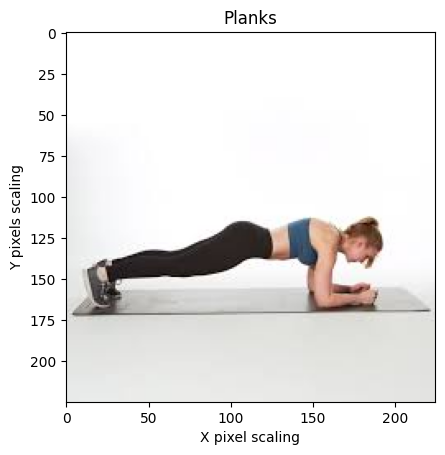

In [7]:
# Viewing a 'push-ups' image
plt.title("Planks")
plt.xlabel("X pixel scaling")
plt.ylabel("Y pixels scaling")
 
image = planks[0] # Selecting the 1st image from all the cruches images
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) # Printing the image in RGB format
plt.show()

### Data Augmentation

In [8]:
# Flipping all the images horizonally
crunches_flipped = []
hand_stands_flipped = []
planks_flipped = []

for i in crunches:
    crunches_flipped.append(cv2.flip(i, 1))

for j in hand_stands:
    hand_stands_flipped.append(cv2.flip(j, 1))

for k in planks:
    planks_flipped.append(cv2.flip(k, 1))

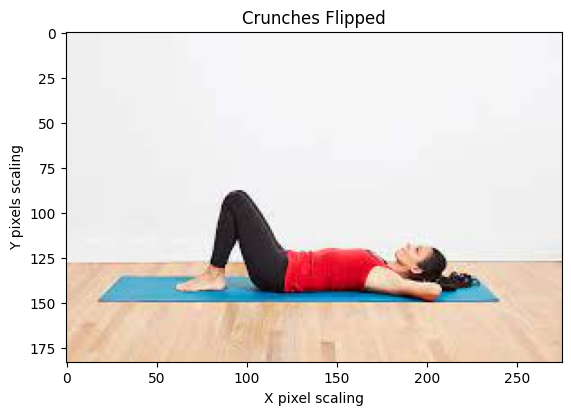

In [9]:
# Viewing a 'crunches' image
plt.title("Crunches Flipped")
plt.xlabel("X pixel scaling")
plt.ylabel("Y pixels scaling")
 
image = crunches_flipped[0] # Selecting the 1st image from all the cruches images
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) # Printing the image in RGB format
plt.show()

In [10]:
# Creating lists of all the primary and the flipped images
crunches_final = crunches + crunches_flipped
hand_stands_final = hand_stands + hand_stands_flipped
planks_final = planks + planks_flipped

### Pre-Processing

#### Renaming All the images (this block of code has already been executed)

```
# Function to rename multiple files
def main():
    i = 0

    for j in ['Crunches/', 'Handstands/', 'Planks/']:
        path = "/media/hpc-lavasa/Data/krish21112016/Data/" + j
    
        for filename in os.listdir(path):
            my_dest = j + str(i) + ".jfif"
            my_source = path + filename
            print(my_source)
            my_dest = path + my_dest
            print(my_dest)
            os.rename(my_source, my_dest) # rename() function will rename all the files
            i += 1
        
# Driver Code
if __name__ == '__main__':
    # Calling main() function
    main()
```

#### Feature Extraction using YOLO (yet to be done)

```
# Load Yolo
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

# Input and Output folder paths
input_folder_path = "D:/Z/CU/SEM4/Machine Learning/CIA/3/Teachable Machine/Crunches"
output_folder_path = 'D:/Z/CU/SEM4/Machine Learning/CIA/CAC3/Output Images/'

# Loop through all the images in the input folder
for filename in os.listdir(input_folder_path):
    if filename.endswith(".jpg"):
        # Load image
        img_path = os.path.join(input_folder_path, filename)
        img = cv2.imread(img_path)
        img = cv2.resize(img, None, fx=0.4, fy=0.4)
        height, width, channels = img.shape

        # Detect objects
        blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
        net.setInput(blob)
        outs = net.forward(output_layers)

        # Initialize variables to store information about detected objects
        class_ids = []
        confidences = []
        boxes = []

        # Iterate over all detected objects
        for out in outs:
            for detection in out:
                scores = detection[5:]
                class_id = np.argmax(scores)
                confidence = scores[class_id]
                if confidence > 0.5:
                    # Object detected
                    center_x = int(detection[0] * width)
                    center_y = int(detection[1] * height)
                    w = int(detection[2] * width)
                    h = int(detection[3] * height)

                    # Rectangle coordinates
                    x = int(center_x - w / 2)
                    y = int(center_y - h / 2)

                    boxes.append([x, y, w, h])
                    confidences.append(float(confidence))
                    class_ids.append(class_id)

        # Remove redundant bounding boxes using Non-Maximum Suppression
        indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

        # Draw bounding boxes and labels on the image
        font = cv2.FONT_HERSHEY_PLAIN
        for i in range(len(boxes)):
            if i in indexes:
                x, y, w, h = boxes[i]
                label = str(classes[class_ids[i]])
                color = colors[i]
                cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
                cv2.putText(img, label, (x, y + 30), font, 3, color, 3)

        # Save the output image in the output folder
        output_path = os.path.join(output_folder_path, filename)
        cv2.imwrite(output_path, img)

        cv2.waitKey(0)
        cv2.destroyAllWindows()
```     

In [25]:
# Load Yolo
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

# Input and Output folder paths
# input_folder_path = "D:/Z/CU/SEM4/Machine Learning/CIA/3/Teachable Machine/Crunches"
output_folder_path = 'D:/Z/CU/SEM4/Machine Learning/CIA/CAC3/Output Images/'

# Loop through all the images in the input folder
for crunch in range(len(planks_final)):
        # Load image
        img = planks_final[crunch]
        height, width, channels = img.shape

        # Detect objects
        blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
        net.setInput(blob)
        outs = net.forward(output_layers)

        # Initialize variables to store information about detected objects
        class_ids = []
        confidences = []
        boxes = []

        # Iterate over all detected objects
        for out in outs:
            for detection in out:
                scores = detection[5:]
                class_id = np.argmax(scores)
                confidence = scores[class_id]
                if confidence > 0.5:
                    # Object detected
                    center_x = int(detection[0] * width)
                    center_y = int(detection[1] * height)
                    w = int(detection[2] * width)
                    h = int(detection[3] * height)

                    # Rectangle coordinates
                    x = int(center_x - w / 2)
                    y = int(center_y - h / 2)

                    boxes.append([x, y, w, h])
                    confidences.append(float(confidence))
                    class_ids.append(class_id)

        # Remove redundant bounding boxes using Non-Maximum Suppression
        indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

        # Draw bounding boxes and labels on the image
        font = cv2.FONT_HERSHEY_PLAIN
        for i in range(len(boxes)):
            if i in indexes:
                x, y, w, h = boxes[i]
                label = str(classes[class_ids[i]])
                color = colors[i]
                cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
                cv2.putText(img, label, (x, y + 30), font, 3, color, 3)

        # Save the output image in the output folder
        output_path = os.path.join(output_folder_path, filename)
        cv2.imwrite(output_path+"crunch"+str(crunch)+".jpg", img)

        cv2.waitKey(0)
        cv2.destroyAllWindows()       

In [26]:
# Load Yolo
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

# Input and Output folder paths
# input_folder_path = "D:/Z/CU/SEM4/Machine Learning/CIA/3/Teachable Machine/Crunches"
output_folder_path = 'D:/Z/CU/SEM4/Machine Learning/CIA/CAC3/Output Images/'

# Loop through all the images in the input folder
for crunch in range(len(planks_final)):
    # Load image
    img = planks_final[crunch]
    height, width, channels = img.shape

    # Detect objects
    blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    net.setInput(blob)
    outs = net.forward(output_layers)

    # Initialize variables to store information about detected objects
    class_ids = []
    confidences = []
    boxes = []

    # Iterate over all detected objects
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                # Object detected
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                # Rectangle coordinates
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    # Remove redundant bounding boxes using Non-Maximum Suppression
    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

    # Draw bounding boxes and labels on the image
    # font = cv2.FONT_HERSHEY_PLAIN
    # for i in range(len(boxes)):
    #     if i in indexes:
    #         x, y, w, h = boxes[i]
    #         label = str(classes[class_ids[i]])
    #         color = colors[i]
    #         cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
    #         cv2.putText(img, label, (x, y + 30), font, 3, color, 3)

    # Save the output image in the output folder
    output_path = os.path.join(output_folder_path, "Crunches" + str(crunch+1) + ".jpg")
    cv2.imwrite(output_path, img)

    cv2.waitKey(0)
    cv2.destroyAllWindows()

#### Turning all the images into GrayScale

In [19]:
crunches_gray = []
for i in crunches_final:
    crunches_gray.append(cv2.cvtColor(i, cv2.COLOR_BGR2GRAY))

In [20]:
hand_stands_gray = []
for i in hand_stands_final:
    hand_stands_gray.append(cv2.cvtColor(i, cv2.COLOR_BGR2GRAY))

In [21]:
planks_gray = []
for i in planks_final:
    planks_gray.append(cv2.cvtColor(i, cv2.COLOR_BGR2GRAY))

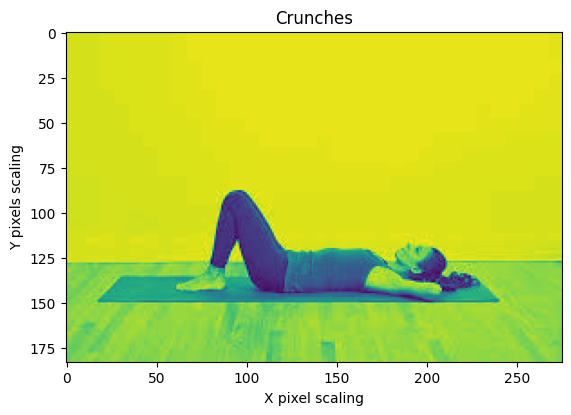

In [22]:
# Viewing a 'crunches' image
plt.title("Crunches")
plt.xlabel("X pixel scaling")
plt.ylabel("Y pixels scaling")
 
image = crunches_gray[40] # Selecting an image from all the cruches images
plt.imshow(image) # Printing the image in GRAY format
plt.show()

#### Resizing the images to 300x300

In [23]:
# Defining the dimensions of the new images
newsize = (300, 300)

# Resizing all the 3 class of images
crunches_resized = []
for i in crunches_gray:
    crunches_resized.append(cv2.resize(i, newsize))

hand_stands_resized = []
for j in hand_stands_gray:
    hand_stands_resized.append(cv2.resize(j, newsize))
    
planks_resized = []
for k in planks_gray:
    planks_resized.append(cv2.resize(k, newsize))

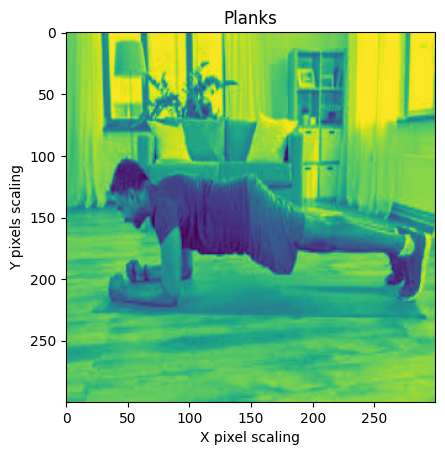

In [24]:
# Viewing a 'planks' image
plt.title("Planks")
plt.xlabel("X pixel scaling")
plt.ylabel("Y pixels scaling")
 
plt.imshow(planks_resized[54])
plt.show()

#### Creating a dataframe of all the features

*Converting all the images to one single list*

In [25]:
crunches_resized[0]

array([[244, 244, 244, ..., 239, 239, 239],
       [244, 244, 244, ..., 239, 239, 239],
       [244, 244, 244, ..., 239, 239, 239],
       ...,
       [204, 205, 206, ..., 198, 198, 198],
       [204, 205, 206, ..., 199, 199, 199],
       [204, 205, 206, ..., 200, 200, 200]], dtype=uint8)

In [26]:
# User-defined function to convert a single image to one single list
def convert_single_img(matrix):
    final_image = [] # converted row
    #Iterating through rows (x axis)
    for x in matrix:
        #Iterating throug columns (y axis)
        for y in x:
            final_image.append(y)    
    
    return final_image

In [27]:
# User-defined function to convert all the images to one into 1 single lists respectively
def convert_all_img(store):
    final_images = []
    for img in store:
        converted_img = convert_single_img(img)
        final_images.append(converted_img)
        
    return final_images

In [28]:
# Applying the above user-defined function to the data 
# and generating class categories for the same
crunches_data  = convert_all_img(crunches_resized)
crunches_target = ["Crunches" for x in range(0,80)]

planks_data =  convert_all_img(planks_resized)
planks_target = ["Plank" for x in range(0,80)]

hand_stands_data =  convert_all_img(hand_stands_resized)
hand_stands_target = ["Hand Stand" for x in range(0,80)]

In [29]:
# Concatincating and merging all the classes into one 
exercise_data_raw = crunches_data + planks_data + hand_stands_data 
exercise_target_raw = crunches_target + planks_target + hand_stands_target

*Shuffling the data*

In [30]:
# Shuffling the data for increasing the efficiency while training
# and assigning each image their respective classes
import random

random.seed(1)
index = [x for x in range(0,240)]
random.shuffle(index)

exercise_data = []
exercise_target = []

for index_i in index:
    exercise_data.append(exercise_data_raw[index_i])
    exercise_target.append(exercise_target_raw[index_i])

*Validating the shuffle of images*

In [31]:
# User-defined function to convert images back to the matrix form
def inverseTransform(image):
    start = 0
    end = 300
    transformed_image = []
    
    for i in range(0, 90000):
        if start == len(image):
            break
        transformed_image.append(image[start:end])
        start += 300
        end += 300
    return transformed_image

In [32]:
validate = inverseTransform(exercise_data[85])
validate.pop()

[196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 196,
 198,
 198,
 198,
 197,
 197,
 197,
 196,
 196,
 195,
 194,
 194,
 194,
 194,
 194,
 194,
 194,
 194,
 192,
 190,
 190,
 190,
 190,
 190,
 190,
 190,
 190,
 184,
 181,
 181,
 181,
 180,
 180,
 180,
 180,
 179,
 181,
 182,
 182,
 183,
 183,
 184,
 184,
 184,
 186,
 187,
 186,
 186,
 185,
 184,
 183,
 183,
 183,
 180,
 177,
 176,
 175,
 173,
 171,
 170,
 169,
 168,
 170,
 171,
 172,
 173,
 175,
 176,
 177,
 178,
 180,
 183,
 183,
 183,
 183,
 183,
 184,
 184,
 184,
 185,
 185,
 183,
 181,
 180,
 178,
 177,
 177,
 177,
 172,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 176,
 184,
 184,
 184,
 184,
 185,
 185,
 185,
 186,
 186,
 188,
 188,
 189,
 189,
 190,
 190,
 190,
 190,
 192,
 194,
 195,
 196,
 197,
 199,
 200,
 202,
 202,
 201,
 202,
 204,
 207,
 209,
 212,
 215,
 217,
 219,
 225,
 225,
 225,
 225,
 225,
 226,
 226,
 227,
 227,
 227,
 227,
 227,
 228,
 228,
 229,
 229,
 229,
 229,
 229,
 229,
 230,
 230,
 230,
 231

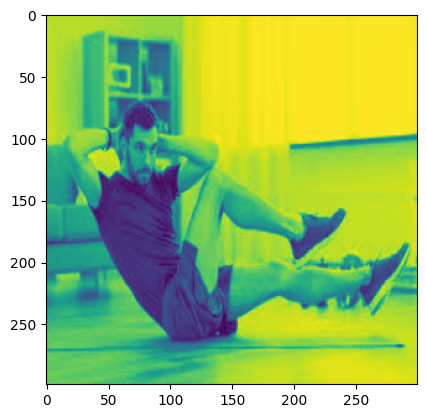

In [33]:
# Plotting the validation image
plt.imshow(validate)
plt.show()

#### Label Encoding

In [34]:
# Label Encoding the target variables
from sklearn.preprocessing import LabelEncoder
exercise_target = LabelEncoder().fit_transform(exercise_target)

### Model Training ( Traditional Classifiers vs CNN)

#### Traditional Classifiers

##### Hyer-parameter Tuning

In [35]:
# Pre-Processing
from sklearn.decomposition import PCA
import pandas as pd

# Model Selection
from sklearn.model_selection import train_test_split

# Models
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluation Metric
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# Computational Time
import time

##### This blocks of code have already been executed. Hence, the list is being defined manually to prevent alteration in outcome.
```
# Generating random_state values
random.seed(235)
random_states = []
for i in range(18):
    random_number = random.randint(0, 1000)
    random_states.append(random_number)
```

In [36]:
random_states = [355, 742, 527, 788, 38, 254, 77, 93, 22, 257, 904, 161, 56, 120, 63, 891, 853, 479]

In [37]:
# Defining values of the parameters
n_comps = n_comps = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 200, 240]

# Defining a list of models
models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier()]

# Definging the dataframe and its attributes
accuracy_dataframe = pd.DataFrame(columns = ['PCA Status', 'Algorhythm', 'n_components', 'Computation Time', 'random_state', 'Accuracy Score', 'F1 score'])

#### Exporting the data for parallel processing (This blocks of code have already been executed)  
```
# exporting the features (data)
np.savetxt('exercise_data.csv', exercise_data, delimiter=',')
        
# exporting the classes (target)
with open('exercise_target.txt', 'w') as file:
    for data in exercise_data:
        file.write(str(data) + '\n')
```

In [48]:
# --- With PCA: LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier() ---

for i in models:
    for j in n_comps:
        for k in random_states:

            # Storing all the values in this empty dictionary
            acc_dict = {}
            
            # applying PCA on the features
            X = exercise_data
            y = exercise_target
            
            # Starting the time counter
            start_time = time.time()
            
            pca = PCA(n_components = j)
            pca.fit_transform(X)
            
            # Model Training 
            i.set_params(random_state = k)

            # Data Splitting
            X_train, X_test, y_train, y_test = train_test_split(X, y)
            # Model Training
            i.fit(X_train, y_train)

            # Ending the time counter
            time_taken = time.time() - start_time

            # Prediction
            y_pred = i.predict(X_test)
            
            acc_dict['PCA Status'] = 'Yes'
            acc_dict['Algorhythm'] = i
            acc_dict['n_components'] = j
            acc_dict['Computation Time'] = time_taken
            acc_dict['random_state'] = k
            acc_dict['Accuracy Score'] = accuracy_score(y_test, y_pred)
            acc_dict['F1 score'] = f1_score(y_test, y_pred, average='weighted')
            print(acc_dict)

            accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)

/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=355), 'n_components': 10, 'Computation Time': 13.74755072593689, 'random_state': 355, 'Accuracy Score': 0.7833333333333333, 'F1 score': 0.7853156146179401}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=742), 'n_components': 10, 'Computation Time': 9.458078622817993, 'random_state': 742, 'Accuracy Score': 0.7833333333333333, 'F1 score': 0.778855486229281}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)
/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=527), 'n_components': 10, 'Computation Time': 13.8746337890625, 'random_state': 527, 'Accuracy Score': 0.65, 'F1 score': 0.6519379844961241}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)
/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dic

{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=788), 'n_components': 10, 'Computation Time': 14.803554058074951, 'random_state': 788, 'Accuracy Score': 0.6166666666666667, 'F1 score': 0.614127193395486}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=38), 'n_components': 10, 'Computation Time': 12.3171968460083, 'random_state': 38, 'Accuracy Score': 0.7833333333333333, 'F1 score': 0.7821848739495798}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=254), 'n_components': 10, 'Computation Time': 11.671308279037476, 'random_state': 254, 'Accuracy Score': 0.7666666666666667, 'F1 score': 0.7600264681555003}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=77), 'n_components': 10, 'Computation Time': 13.393472909927368, 'random_state': 77, 'Accuracy Score': 0.75, 'F1 score': 0.756010101010101}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=93), 'n_components': 10, 'Computation Time': 14.41450834274292, 'random_state': 93, 'Accuracy Score': 0.7833333333333333, 'F1 score': 0.778187477937165}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=22), 'n_components': 10, 'Computation Time': 11.967319011688232, 'random_state': 22, 'Accuracy Score': 0.6, 'F1 score': 0.5935}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=257), 'n_components': 10, 'Computation Time': 15.008064985275269, 'random_state': 257, 'Accuracy Score': 0.7333333333333333, 'F1 score': 0.7355311355311355}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)
/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dic

{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=904), 'n_components': 10, 'Computation Time': 12.882756233215332, 'random_state': 904, 'Accuracy Score': 0.7833333333333333, 'F1 score': 0.7815114709851552}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=161), 'n_components': 10, 'Computation Time': 13.713826417922974, 'random_state': 161, 'Accuracy Score': 0.7666666666666667, 'F1 score': 0.763452157598499}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)
/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=56), 'n_components': 10, 'Computation Time': 12.614890098571777, 'random_state': 56, 'Accuracy Score': 0.7666666666666667, 'F1 score': 0.7802740894790168}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)
/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dic

{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=120), 'n_components': 10, 'Computation Time': 11.004119396209717, 'random_state': 120, 'Accuracy Score': 0.7833333333333333, 'F1 score': 0.7840911803317818}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=63), 'n_components': 10, 'Computation Time': 13.773392915725708, 'random_state': 63, 'Accuracy Score': 0.7, 'F1 score': 0.6991452991452991}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)
/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=891), 'n_components': 10, 'Computation Time': 12.984198093414307, 'random_state': 891, 'Accuracy Score': 0.7333333333333333, 'F1 score': 0.7336285936285936}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)
/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=853), 'n_components': 10, 'Computation Time': 15.719385147094727, 'random_state': 853, 'Accuracy Score': 0.8166666666666667, 'F1 score': 0.817148226450552}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)
/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=479), 'n_components': 10, 'Computation Time': 13.626428842544556, 'random_state': 479, 'Accuracy Score': 0.7, 'F1 score': 0.7}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)
/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dic

{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=355), 'n_components': 20, 'Computation Time': 15.752716541290283, 'random_state': 355, 'Accuracy Score': 0.75, 'F1 score': 0.7448660410716715}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=742), 'n_components': 20, 'Computation Time': 15.402134418487549, 'random_state': 742, 'Accuracy Score': 0.8166666666666667, 'F1 score': 0.8111111111111112}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)
/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dic

{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=527), 'n_components': 20, 'Computation Time': 13.50815749168396, 'random_state': 527, 'Accuracy Score': 0.7166666666666667, 'F1 score': 0.7151605758582503}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=788), 'n_components': 20, 'Computation Time': 15.691749334335327, 'random_state': 788, 'Accuracy Score': 0.7333333333333333, 'F1 score': 0.7329870129870131}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=38), 'n_components': 20, 'Computation Time': 11.779457092285156, 'random_state': 38, 'Accuracy Score': 0.7166666666666667, 'F1 score': 0.7180937554056392}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=254), 'n_components': 20, 'Computation Time': 15.39361047744751, 'random_state': 254, 'Accuracy Score': 0.8, 'F1 score': 0.7986001217285453}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)
/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dic

{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=77), 'n_components': 20, 'Computation Time': 16.80965566635132, 'random_state': 77, 'Accuracy Score': 0.7, 'F1 score': 0.695610929557008}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=93), 'n_components': 20, 'Computation Time': 13.735295534133911, 'random_state': 93, 'Accuracy Score': 0.7, 'F1 score': 0.6959099437148218}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=22), 'n_components': 20, 'Computation Time': 13.516160249710083, 'random_state': 22, 'Accuracy Score': 0.6, 'F1 score': 0.6089118198874296}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=257), 'n_components': 20, 'Computation Time': 14.185612440109253, 'random_state': 257, 'Accuracy Score': 0.6666666666666666, 'F1 score': 0.6633613018052377}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=904), 'n_components': 20, 'Computation Time': 12.545058488845825, 'random_state': 904, 'Accuracy Score': 0.7666666666666667, 'F1 score': 0.7568627450980394}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)
/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dic

{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=161), 'n_components': 20, 'Computation Time': 11.680575609207153, 'random_state': 161, 'Accuracy Score': 0.8166666666666667, 'F1 score': 0.8162578162578163}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=56), 'n_components': 20, 'Computation Time': 11.613611459732056, 'random_state': 56, 'Accuracy Score': 0.7833333333333333, 'F1 score': 0.7847890671420082}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=120), 'n_components': 20, 'Computation Time': 11.483532905578613, 'random_state': 120, 'Accuracy Score': 0.7, 'F1 score': 0.7004448742746614}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)
/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dic

{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=63), 'n_components': 20, 'Computation Time': 14.663148403167725, 'random_state': 63, 'Accuracy Score': 0.8166666666666667, 'F1 score': 0.8160866351746523}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=891), 'n_components': 20, 'Computation Time': 12.96086835861206, 'random_state': 891, 'Accuracy Score': 0.7, 'F1 score': 0.6957127340106063}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=853), 'n_components': 20, 'Computation Time': 13.625022649765015, 'random_state': 853, 'Accuracy Score': 0.7, 'F1 score': 0.7004294992667087}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=479), 'n_components': 20, 'Computation Time': 14.750028848648071, 'random_state': 479, 'Accuracy Score': 0.7333333333333333, 'F1 score': 0.7330232558139536}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=355), 'n_components': 30, 'Computation Time': 13.913865089416504, 'random_state': 355, 'Accuracy Score': 0.7666666666666667, 'F1 score': 0.7657747543461828}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=742), 'n_components': 30, 'Computation Time': 13.93101191520691, 'random_state': 742, 'Accuracy Score': 0.75, 'F1 score': 0.7527056277056278}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=527), 'n_components': 30, 'Computation Time': 17.6121506690979, 'random_state': 527, 'Accuracy Score': 0.7666666666666667, 'F1 score': 0.7633760683760684}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=788), 'n_components': 30, 'Computation Time': 13.780927181243896, 'random_state': 788, 'Accuracy Score': 0.7166666666666667, 'F1 score': 0.7105133752950432}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=38), 'n_components': 30, 'Computation Time': 13.366136074066162, 'random_state': 38, 'Accuracy Score': 0.7166666666666667, 'F1 score': 0.7161246612466123}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=254), 'n_components': 30, 'Computation Time': 13.848205327987671, 'random_state': 254, 'Accuracy Score': 0.7666666666666667, 'F1 score': 0.7564935064935064}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)
/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dic

{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=77), 'n_components': 30, 'Computation Time': 12.432348489761353, 'random_state': 77, 'Accuracy Score': 0.8, 'F1 score': 0.7906604506604505}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=93), 'n_components': 30, 'Computation Time': 14.153077602386475, 'random_state': 93, 'Accuracy Score': 0.6833333333333333, 'F1 score': 0.6885917835734237}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)
/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dic

{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=22), 'n_components': 30, 'Computation Time': 15.088218450546265, 'random_state': 22, 'Accuracy Score': 0.8, 'F1 score': 0.8052584052584052}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=257), 'n_components': 30, 'Computation Time': 16.431920528411865, 'random_state': 257, 'Accuracy Score': 0.7833333333333333, 'F1 score': 0.7812750142938822}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)
/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dic

{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=904), 'n_components': 30, 'Computation Time': 12.077967643737793, 'random_state': 904, 'Accuracy Score': 0.7166666666666667, 'F1 score': 0.7073574874576126}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=161), 'n_components': 30, 'Computation Time': 13.792276859283447, 'random_state': 161, 'Accuracy Score': 0.6666666666666666, 'F1 score': 0.663713364932877}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=56), 'n_components': 30, 'Computation Time': 11.149565696716309, 'random_state': 56, 'Accuracy Score': 0.7166666666666667, 'F1 score': 0.7051457902001381}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=120), 'n_components': 30, 'Computation Time': 13.507189273834229, 'random_state': 120, 'Accuracy Score': 0.7666666666666667, 'F1 score': 0.7657142857142856}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)
/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dic

{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=63), 'n_components': 30, 'Computation Time': 11.038133382797241, 'random_state': 63, 'Accuracy Score': 0.7333333333333333, 'F1 score': 0.7327796234772979}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=891), 'n_components': 30, 'Computation Time': 11.508976697921753, 'random_state': 891, 'Accuracy Score': 0.6333333333333333, 'F1 score': 0.632944832944833}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=853), 'n_components': 30, 'Computation Time': 13.894370555877686, 'random_state': 853, 'Accuracy Score': 0.7333333333333333, 'F1 score': 0.723048433048433}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=479), 'n_components': 30, 'Computation Time': 11.033138513565063, 'random_state': 479, 'Accuracy Score': 0.75, 'F1 score': 0.7439066624432478}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=355), 'n_components': 40, 'Computation Time': 15.307304382324219, 'random_state': 355, 'Accuracy Score': 0.85, 'F1 score': 0.8496336996336997}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)
/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dic

{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=742), 'n_components': 40, 'Computation Time': 12.231905221939087, 'random_state': 742, 'Accuracy Score': 0.7666666666666667, 'F1 score': 0.7619144144144145}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=527), 'n_components': 40, 'Computation Time': 15.464104175567627, 'random_state': 527, 'Accuracy Score': 0.7666666666666667, 'F1 score': 0.7610242393423171}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=788), 'n_components': 40, 'Computation Time': 11.656012773513794, 'random_state': 788, 'Accuracy Score': 0.8166666666666667, 'F1 score': 0.8111619474217459}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)
/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=38), 'n_components': 40, 'Computation Time': 11.329477310180664, 'random_state': 38, 'Accuracy Score': 0.75, 'F1 score': 0.7487961225766103}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)
/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dic

{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=254), 'n_components': 40, 'Computation Time': 14.835212469100952, 'random_state': 254, 'Accuracy Score': 0.7166666666666667, 'F1 score': 0.7179549114331724}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=77), 'n_components': 40, 'Computation Time': 12.656883955001831, 'random_state': 77, 'Accuracy Score': 0.75, 'F1 score': 0.7475907963712842}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=93), 'n_components': 40, 'Computation Time': 12.832876443862915, 'random_state': 93, 'Accuracy Score': 0.7666666666666667, 'F1 score': 0.7644510418384737}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)
/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dic

{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=22), 'n_components': 40, 'Computation Time': 12.94778323173523, 'random_state': 22, 'Accuracy Score': 0.8166666666666667, 'F1 score': 0.8108128908128908}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=257), 'n_components': 40, 'Computation Time': 13.498071908950806, 'random_state': 257, 'Accuracy Score': 0.6833333333333333, 'F1 score': 0.6745309568480299}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=904), 'n_components': 40, 'Computation Time': 11.183504581451416, 'random_state': 904, 'Accuracy Score': 0.7, 'F1 score': 0.7033439234941112}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=161), 'n_components': 40, 'Computation Time': 12.564136266708374, 'random_state': 161, 'Accuracy Score': 0.65, 'F1 score': 0.6454265232974912}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=56), 'n_components': 40, 'Computation Time': 15.250925540924072, 'random_state': 56, 'Accuracy Score': 0.7, 'F1 score': 0.6854944796805262}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=120), 'n_components': 40, 'Computation Time': 13.072091579437256, 'random_state': 120, 'Accuracy Score': 0.8166666666666667, 'F1 score': 0.8165743816906608}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)
/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=63), 'n_components': 40, 'Computation Time': 15.428780794143677, 'random_state': 63, 'Accuracy Score': 0.7333333333333333, 'F1 score': 0.7354166666666667}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)
/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dic

{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=891), 'n_components': 40, 'Computation Time': 12.990267276763916, 'random_state': 891, 'Accuracy Score': 0.6666666666666666, 'F1 score': 0.6655362131957877}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=853), 'n_components': 40, 'Computation Time': 16.993926525115967, 'random_state': 853, 'Accuracy Score': 0.75, 'F1 score': 0.7387631062517523}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)
/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dic

{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=479), 'n_components': 40, 'Computation Time': 12.495358228683472, 'random_state': 479, 'Accuracy Score': 0.7333333333333333, 'F1 score': 0.7272435897435898}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=355), 'n_components': 50, 'Computation Time': 16.868252754211426, 'random_state': 355, 'Accuracy Score': 0.7333333333333333, 'F1 score': 0.7344438946616088}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)
/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dic

{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=742), 'n_components': 50, 'Computation Time': 17.37727403640747, 'random_state': 742, 'Accuracy Score': 0.6833333333333333, 'F1 score': 0.6804292929292929}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=527), 'n_components': 50, 'Computation Time': 16.528811931610107, 'random_state': 527, 'Accuracy Score': 0.6833333333333333, 'F1 score': 0.6827777777777778}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=788), 'n_components': 50, 'Computation Time': 16.299306392669678, 'random_state': 788, 'Accuracy Score': 0.75, 'F1 score': 0.7497916666666666}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=38), 'n_components': 50, 'Computation Time': 15.28077745437622, 'random_state': 38, 'Accuracy Score': 0.7833333333333333, 'F1 score': 0.7671513372907356}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=254), 'n_components': 50, 'Computation Time': 16.49722385406494, 'random_state': 254, 'Accuracy Score': 0.7333333333333333, 'F1 score': 0.7313204508856683}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)
/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dic

{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=77), 'n_components': 50, 'Computation Time': 15.41112732887268, 'random_state': 77, 'Accuracy Score': 0.8, 'F1 score': 0.8010269576379975}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=93), 'n_components': 50, 'Computation Time': 14.7753586769104, 'random_state': 93, 'Accuracy Score': 0.8166666666666667, 'F1 score': 0.8110691110691112}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=22), 'n_components': 50, 'Computation Time': 13.64427661895752, 'random_state': 22, 'Accuracy Score': 0.7166666666666667, 'F1 score': 0.7129292929292929}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=257), 'n_components': 50, 'Computation Time': 13.938560009002686, 'random_state': 257, 'Accuracy Score': 0.65, 'F1 score': 0.6494318181818183}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=904), 'n_components': 50, 'Computation Time': 14.346027135848999, 'random_state': 904, 'Accuracy Score': 0.7833333333333333, 'F1 score': 0.7804651162790698}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)
/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dic

{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=161), 'n_components': 50, 'Computation Time': 14.146745204925537, 'random_state': 161, 'Accuracy Score': 0.75, 'F1 score': 0.7448696145124717}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=56), 'n_components': 50, 'Computation Time': 16.1393141746521, 'random_state': 56, 'Accuracy Score': 0.7666666666666667, 'F1 score': 0.7632763532763533}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)
/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=120), 'n_components': 50, 'Computation Time': 15.595243215560913, 'random_state': 120, 'Accuracy Score': 0.7833333333333333, 'F1 score': 0.7839253415004938}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)
/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=63), 'n_components': 50, 'Computation Time': 14.210959434509277, 'random_state': 63, 'Accuracy Score': 0.6833333333333333, 'F1 score': 0.6720684803001876}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)
/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=891), 'n_components': 50, 'Computation Time': 14.826413869857788, 'random_state': 891, 'Accuracy Score': 0.7333333333333333, 'F1 score': 0.7310194404931245}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)
/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dic

{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=853), 'n_components': 50, 'Computation Time': 14.266838073730469, 'random_state': 853, 'Accuracy Score': 0.7333333333333333, 'F1 score': 0.7322732857127325}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=479), 'n_components': 50, 'Computation Time': 12.28271222114563, 'random_state': 479, 'Accuracy Score': 0.7666666666666667, 'F1 score': 0.7667869997657232}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=355), 'n_components': 60, 'Computation Time': 15.820628881454468, 'random_state': 355, 'Accuracy Score': 0.7666666666666667, 'F1 score': 0.7650505906603468}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=742), 'n_components': 60, 'Computation Time': 11.32728385925293, 'random_state': 742, 'Accuracy Score': 0.7833333333333333, 'F1 score': 0.7857839291131826}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=527), 'n_components': 60, 'Computation Time': 15.644652843475342, 'random_state': 527, 'Accuracy Score': 0.7166666666666667, 'F1 score': 0.7161381254404511}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)
/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dic

{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=788), 'n_components': 60, 'Computation Time': 16.52657389640808, 'random_state': 788, 'Accuracy Score': 0.7666666666666667, 'F1 score': 0.7653791422084104}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=38), 'n_components': 60, 'Computation Time': 14.743716478347778, 'random_state': 38, 'Accuracy Score': 0.75, 'F1 score': 0.7447533044092421}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=254), 'n_components': 60, 'Computation Time': 17.03690004348755, 'random_state': 254, 'Accuracy Score': 0.65, 'F1 score': 0.6427938769615866}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=77), 'n_components': 60, 'Computation Time': 15.801702737808228, 'random_state': 77, 'Accuracy Score': 0.7, 'F1 score': 0.6954270059533219}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=93), 'n_components': 60, 'Computation Time': 16.130472898483276, 'random_state': 93, 'Accuracy Score': 0.8, 'F1 score': 0.7998663101604279}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=22), 'n_components': 60, 'Computation Time': 15.905864000320435, 'random_state': 22, 'Accuracy Score': 0.6833333333333333, 'F1 score': 0.6763178850135373}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)
/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dic

{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=257), 'n_components': 60, 'Computation Time': 16.31328558921814, 'random_state': 257, 'Accuracy Score': 0.7833333333333333, 'F1 score': 0.7851269092542678}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=904), 'n_components': 60, 'Computation Time': 16.330065965652466, 'random_state': 904, 'Accuracy Score': 0.7166666666666667, 'F1 score': 0.7210463547060855}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=161), 'n_components': 60, 'Computation Time': 17.4487566947937, 'random_state': 161, 'Accuracy Score': 0.7333333333333333, 'F1 score': 0.7304604022627278}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=56), 'n_components': 60, 'Computation Time': 15.54624319076538, 'random_state': 56, 'Accuracy Score': 0.7666666666666667, 'F1 score': 0.7636111111111111}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=120), 'n_components': 60, 'Computation Time': 16.928834199905396, 'random_state': 120, 'Accuracy Score': 0.7333333333333333, 'F1 score': 0.7297728076094991}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)
/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dic

{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=63), 'n_components': 60, 'Computation Time': 17.467872858047485, 'random_state': 63, 'Accuracy Score': 0.6833333333333333, 'F1 score': 0.6873517126148705}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=891), 'n_components': 60, 'Computation Time': 16.30472445487976, 'random_state': 891, 'Accuracy Score': 0.7333333333333333, 'F1 score': 0.7265603402445507}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=853), 'n_components': 60, 'Computation Time': 14.460724592208862, 'random_state': 853, 'Accuracy Score': 0.6666666666666666, 'F1 score': 0.6655555555555556}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=479), 'n_components': 60, 'Computation Time': 15.417676210403442, 'random_state': 479, 'Accuracy Score': 0.7833333333333333, 'F1 score': 0.7792065663474692}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=355), 'n_components': 70, 'Computation Time': 16.483633041381836, 'random_state': 355, 'Accuracy Score': 0.8, 'F1 score': 0.7983511586452764}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)
/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dic

{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=742), 'n_components': 70, 'Computation Time': 14.96203875541687, 'random_state': 742, 'Accuracy Score': 0.75, 'F1 score': 0.7426961926961925}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=527), 'n_components': 70, 'Computation Time': 17.151856422424316, 'random_state': 527, 'Accuracy Score': 0.75, 'F1 score': 0.7489578322911655}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=788), 'n_components': 70, 'Computation Time': 17.238842725753784, 'random_state': 788, 'Accuracy Score': 0.7166666666666667, 'F1 score': 0.71001221001221}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=38), 'n_components': 70, 'Computation Time': 13.09934139251709, 'random_state': 38, 'Accuracy Score': 0.75, 'F1 score': 0.7473783888418034}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=254), 'n_components': 70, 'Computation Time': 16.623762369155884, 'random_state': 254, 'Accuracy Score': 0.75, 'F1 score': 0.7439522024146388}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=77), 'n_components': 70, 'Computation Time': 15.357726573944092, 'random_state': 77, 'Accuracy Score': 0.75, 'F1 score': 0.7511111111111112}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=93), 'n_components': 70, 'Computation Time': 13.305518627166748, 'random_state': 93, 'Accuracy Score': 0.8, 'F1 score': 0.7975561554034514}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=22), 'n_components': 70, 'Computation Time': 15.130888938903809, 'random_state': 22, 'Accuracy Score': 0.75, 'F1 score': 0.7519025674786043}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=257), 'n_components': 70, 'Computation Time': 13.712185859680176, 'random_state': 257, 'Accuracy Score': 0.75, 'F1 score': 0.7497835497835498}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=904), 'n_components': 70, 'Computation Time': 15.090877294540405, 'random_state': 904, 'Accuracy Score': 0.75, 'F1 score': 0.7421768707482993}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=161), 'n_components': 70, 'Computation Time': 15.714497566223145, 'random_state': 161, 'Accuracy Score': 0.7333333333333333, 'F1 score': 0.7340666247642992}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)
/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=56), 'n_components': 70, 'Computation Time': 16.557384729385376, 'random_state': 56, 'Accuracy Score': 0.7, 'F1 score': 0.6932142857142857}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)
/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dic

{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=120), 'n_components': 70, 'Computation Time': 16.864763736724854, 'random_state': 120, 'Accuracy Score': 0.8, 'F1 score': 0.7965989684074789}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=63), 'n_components': 70, 'Computation Time': 17.936971187591553, 'random_state': 63, 'Accuracy Score': 0.7166666666666667, 'F1 score': 0.7125356125356125}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=891), 'n_components': 70, 'Computation Time': 13.5202054977417, 'random_state': 891, 'Accuracy Score': 0.65, 'F1 score': 0.6485896112831099}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)
/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=853), 'n_components': 70, 'Computation Time': 17.50762701034546, 'random_state': 853, 'Accuracy Score': 0.7333333333333333, 'F1 score': 0.728925973470261}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)
/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=479), 'n_components': 70, 'Computation Time': 16.039952278137207, 'random_state': 479, 'Accuracy Score': 0.7333333333333333, 'F1 score': 0.7322600340627913}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)
/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dic

{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=355), 'n_components': 80, 'Computation Time': 14.731890439987183, 'random_state': 355, 'Accuracy Score': 0.7, 'F1 score': 0.69375}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=742), 'n_components': 80, 'Computation Time': 15.10015344619751, 'random_state': 742, 'Accuracy Score': 0.7833333333333333, 'F1 score': 0.7839793281653746}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=527), 'n_components': 80, 'Computation Time': 18.418477535247803, 'random_state': 527, 'Accuracy Score': 0.7166666666666667, 'F1 score': 0.7119374523264684}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)
/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dic

{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=788), 'n_components': 80, 'Computation Time': 19.04792022705078, 'random_state': 788, 'Accuracy Score': 0.75, 'F1 score': 0.7437712130735386}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=38), 'n_components': 80, 'Computation Time': 16.029754638671875, 'random_state': 38, 'Accuracy Score': 0.75, 'F1 score': 0.7509469696969696}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)
/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=254), 'n_components': 80, 'Computation Time': 19.90088963508606, 'random_state': 254, 'Accuracy Score': 0.7166666666666667, 'F1 score': 0.7115099715099716}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)
/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dic

{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=77), 'n_components': 80, 'Computation Time': 17.558122158050537, 'random_state': 77, 'Accuracy Score': 0.7666666666666667, 'F1 score': 0.7621590180153733}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=93), 'n_components': 80, 'Computation Time': 13.818094968795776, 'random_state': 93, 'Accuracy Score': 0.8166666666666667, 'F1 score': 0.8161631274131272}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=22), 'n_components': 80, 'Computation Time': 17.240830183029175, 'random_state': 22, 'Accuracy Score': 0.7166666666666667, 'F1 score': 0.7144704570791528}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=257), 'n_components': 80, 'Computation Time': 15.99209189414978, 'random_state': 257, 'Accuracy Score': 0.6666666666666666, 'F1 score': 0.6658108686350022}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=904), 'n_components': 80, 'Computation Time': 17.35533571243286, 'random_state': 904, 'Accuracy Score': 0.7666666666666667, 'F1 score': 0.7636591478696741}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=161), 'n_components': 80, 'Computation Time': 17.360538244247437, 'random_state': 161, 'Accuracy Score': 0.7666666666666667, 'F1 score': 0.759168035030104}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)
/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=56), 'n_components': 80, 'Computation Time': 14.340707302093506, 'random_state': 56, 'Accuracy Score': 0.6833333333333333, 'F1 score': 0.6844595254369691}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)
/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dic

{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=120), 'n_components': 80, 'Computation Time': 16.464680671691895, 'random_state': 120, 'Accuracy Score': 0.7, 'F1 score': 0.6954912954912954}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=63), 'n_components': 80, 'Computation Time': 16.913760900497437, 'random_state': 63, 'Accuracy Score': 0.6833333333333333, 'F1 score': 0.6760633910686934}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)
/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dic

{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=891), 'n_components': 80, 'Computation Time': 13.04349160194397, 'random_state': 891, 'Accuracy Score': 0.7666666666666667, 'F1 score': 0.7618857565199028}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=853), 'n_components': 80, 'Computation Time': 17.96364951133728, 'random_state': 853, 'Accuracy Score': 0.7333333333333333, 'F1 score': 0.7292452830188679}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=479), 'n_components': 80, 'Computation Time': 17.597065448760986, 'random_state': 479, 'Accuracy Score': 0.8, 'F1 score': 0.7996117954460619}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)
/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=355), 'n_components': 90, 'Computation Time': 19.10144591331482, 'random_state': 355, 'Accuracy Score': 0.7166666666666667, 'F1 score': 0.7166666666666667}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)
/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=742), 'n_components': 90, 'Computation Time': 16.158382892608643, 'random_state': 742, 'Accuracy Score': 0.7, 'F1 score': 0.6971560471418667}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)
/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dic

{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=527), 'n_components': 90, 'Computation Time': 15.961676836013794, 'random_state': 527, 'Accuracy Score': 0.7333333333333333, 'F1 score': 0.7338915470494418}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=788), 'n_components': 90, 'Computation Time': 16.827887058258057, 'random_state': 788, 'Accuracy Score': 0.75, 'F1 score': 0.7402888299440025}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)
/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=38), 'n_components': 90, 'Computation Time': 20.15066909790039, 'random_state': 38, 'Accuracy Score': 0.7, 'F1 score': 0.6976348854397635}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)
/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dic

{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=254), 'n_components': 90, 'Computation Time': 18.087259531021118, 'random_state': 254, 'Accuracy Score': 0.7333333333333333, 'F1 score': 0.7257311320754717}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=77), 'n_components': 90, 'Computation Time': 24.60311198234558, 'random_state': 77, 'Accuracy Score': 0.7666666666666667, 'F1 score': 0.7663138663138663}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)
/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=93), 'n_components': 90, 'Computation Time': 33.923306703567505, 'random_state': 93, 'Accuracy Score': 0.8, 'F1 score': 0.797758942286592}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)
/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dic

{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=22), 'n_components': 90, 'Computation Time': 27.561203479766846, 'random_state': 22, 'Accuracy Score': 0.7, 'F1 score': 0.6989316239316239}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=257), 'n_components': 90, 'Computation Time': 19.597758293151855, 'random_state': 257, 'Accuracy Score': 0.6666666666666666, 'F1 score': 0.6663120567375886}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)
/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=904), 'n_components': 90, 'Computation Time': 16.37775707244873, 'random_state': 904, 'Accuracy Score': 0.6666666666666666, 'F1 score': 0.6515980093369403}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)
/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dic

{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=161), 'n_components': 90, 'Computation Time': 19.36413812637329, 'random_state': 161, 'Accuracy Score': 0.7666666666666667, 'F1 score': 0.7656208656208656}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=56), 'n_components': 90, 'Computation Time': 17.192227602005005, 'random_state': 56, 'Accuracy Score': 0.7, 'F1 score': 0.6952779649595687}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)
/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dic

{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=120), 'n_components': 90, 'Computation Time': 15.685312509536743, 'random_state': 120, 'Accuracy Score': 0.75, 'F1 score': 0.7546009631922943}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=63), 'n_components': 90, 'Computation Time': 17.73513412475586, 'random_state': 63, 'Accuracy Score': 0.6833333333333333, 'F1 score': 0.6804527932187506}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=891), 'n_components': 90, 'Computation Time': 19.24172592163086, 'random_state': 891, 'Accuracy Score': 0.6333333333333333, 'F1 score': 0.6302222222222222}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=853), 'n_components': 90, 'Computation Time': 14.356063604354858, 'random_state': 853, 'Accuracy Score': 0.9, 'F1 score': 0.8979157938835358}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=479), 'n_components': 90, 'Computation Time': 18.520394563674927, 'random_state': 479, 'Accuracy Score': 0.7333333333333333, 'F1 score': 0.7273333333333334}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)
/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dic

{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=355), 'n_components': 100, 'Computation Time': 10.769027709960938, 'random_state': 355, 'Accuracy Score': 0.7666666666666667, 'F1 score': 0.7637573211102623}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=742), 'n_components': 100, 'Computation Time': 11.099692106246948, 'random_state': 742, 'Accuracy Score': 0.7166666666666667, 'F1 score': 0.7122527233115469}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=527), 'n_components': 100, 'Computation Time': 10.26640772819519, 'random_state': 527, 'Accuracy Score': 0.7833333333333333, 'F1 score': 0.7777070814186402}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=788), 'n_components': 100, 'Computation Time': 11.545501470565796, 'random_state': 788, 'Accuracy Score': 0.7166666666666667, 'F1 score': 0.7136381564119901}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=38), 'n_components': 100, 'Computation Time': 12.281475067138672, 'random_state': 38, 'Accuracy Score': 0.7666666666666667, 'F1 score': 0.7647231132495766}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=254), 'n_components': 100, 'Computation Time': 10.592719078063965, 'random_state': 254, 'Accuracy Score': 0.7, 'F1 score': 0.6904730229120472}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=77), 'n_components': 100, 'Computation Time': 12.2135751247406, 'random_state': 77, 'Accuracy Score': 0.6833333333333333, 'F1 score': 0.6791837972988524}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=93), 'n_components': 100, 'Computation Time': 11.448901653289795, 'random_state': 93, 'Accuracy Score': 0.7333333333333333, 'F1 score': 0.7307017543859649}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=22), 'n_components': 100, 'Computation Time': 11.793980121612549, 'random_state': 22, 'Accuracy Score': 0.7166666666666667, 'F1 score': 0.7157158783245738}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=257), 'n_components': 100, 'Computation Time': 12.068175077438354, 'random_state': 257, 'Accuracy Score': 0.7333333333333333, 'F1 score': 0.7380287827782681}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=904), 'n_components': 100, 'Computation Time': 13.441138744354248, 'random_state': 904, 'Accuracy Score': 0.65, 'F1 score': 0.6462424633936263}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=161), 'n_components': 100, 'Computation Time': 11.564229726791382, 'random_state': 161, 'Accuracy Score': 0.7333333333333333, 'F1 score': 0.7326388888888888}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=56), 'n_components': 100, 'Computation Time': 11.374048709869385, 'random_state': 56, 'Accuracy Score': 0.7666666666666667, 'F1 score': 0.763772670419012}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=120), 'n_components': 100, 'Computation Time': 11.949971199035645, 'random_state': 120, 'Accuracy Score': 0.7833333333333333, 'F1 score': 0.7776596079914287}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=63), 'n_components': 100, 'Computation Time': 11.16779899597168, 'random_state': 63, 'Accuracy Score': 0.8, 'F1 score': 0.7991477272727273}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=891), 'n_components': 100, 'Computation Time': 10.59953498840332, 'random_state': 891, 'Accuracy Score': 0.6833333333333333, 'F1 score': 0.6862222222222222}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=853), 'n_components': 100, 'Computation Time': 10.689508199691772, 'random_state': 853, 'Accuracy Score': 0.6833333333333333, 'F1 score': 0.683049645390071}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=479), 'n_components': 100, 'Computation Time': 11.420658826828003, 'random_state': 479, 'Accuracy Score': 0.7833333333333333, 'F1 score': 0.7796747967479675}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=355), 'n_components': 110, 'Computation Time': 12.408690929412842, 'random_state': 355, 'Accuracy Score': 0.75, 'F1 score': 0.7502284427284426}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=742), 'n_components': 110, 'Computation Time': 10.993164777755737, 'random_state': 742, 'Accuracy Score': 0.7833333333333333, 'F1 score': 0.7807832544076125}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=527), 'n_components': 110, 'Computation Time': 11.238159894943237, 'random_state': 527, 'Accuracy Score': 0.7333333333333333, 'F1 score': 0.7297912268355619}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=788), 'n_components': 110, 'Computation Time': 11.394335746765137, 'random_state': 788, 'Accuracy Score': 0.7666666666666667, 'F1 score': 0.763888888888889}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=38), 'n_components': 110, 'Computation Time': 11.17063307762146, 'random_state': 38, 'Accuracy Score': 0.6833333333333333, 'F1 score': 0.6793650793650793}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=254), 'n_components': 110, 'Computation Time': 11.108250617980957, 'random_state': 254, 'Accuracy Score': 0.75, 'F1 score': 0.7483333333333334}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=77), 'n_components': 110, 'Computation Time': 11.076361417770386, 'random_state': 77, 'Accuracy Score': 0.7833333333333333, 'F1 score': 0.7845029239766083}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=93), 'n_components': 110, 'Computation Time': 10.445783376693726, 'random_state': 93, 'Accuracy Score': 0.75, 'F1 score': 0.744976953697884}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=22), 'n_components': 110, 'Computation Time': 10.689077854156494, 'random_state': 22, 'Accuracy Score': 0.7833333333333333, 'F1 score': 0.7868321513002364}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=257), 'n_components': 110, 'Computation Time': 10.865912437438965, 'random_state': 257, 'Accuracy Score': 0.7833333333333333, 'F1 score': 0.7822091886608017}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=904), 'n_components': 110, 'Computation Time': 11.82732081413269, 'random_state': 904, 'Accuracy Score': 0.6833333333333333, 'F1 score': 0.6782452665431388}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=161), 'n_components': 110, 'Computation Time': 10.953539609909058, 'random_state': 161, 'Accuracy Score': 0.7166666666666667, 'F1 score': 0.7097101449275363}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=56), 'n_components': 110, 'Computation Time': 11.466294288635254, 'random_state': 56, 'Accuracy Score': 0.6333333333333333, 'F1 score': 0.6228634085213033}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=120), 'n_components': 110, 'Computation Time': 11.330647230148315, 'random_state': 120, 'Accuracy Score': 0.6666666666666666, 'F1 score': 0.6614947089947091}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=63), 'n_components': 110, 'Computation Time': 10.590876817703247, 'random_state': 63, 'Accuracy Score': 0.7333333333333333, 'F1 score': 0.7346631596631598}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=891), 'n_components': 110, 'Computation Time': 10.230050802230835, 'random_state': 891, 'Accuracy Score': 0.7833333333333333, 'F1 score': 0.777960927960928}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=853), 'n_components': 110, 'Computation Time': 11.524382591247559, 'random_state': 853, 'Accuracy Score': 0.7333333333333333, 'F1 score': 0.7292272347535504}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=479), 'n_components': 110, 'Computation Time': 12.538912534713745, 'random_state': 479, 'Accuracy Score': 0.7166666666666667, 'F1 score': 0.7177489177489177}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=355), 'n_components': 120, 'Computation Time': 10.969611883163452, 'random_state': 355, 'Accuracy Score': 0.7166666666666667, 'F1 score': 0.718302513039355}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=742), 'n_components': 120, 'Computation Time': 11.652372598648071, 'random_state': 742, 'Accuracy Score': 0.7833333333333333, 'F1 score': 0.7791316752799311}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=527), 'n_components': 120, 'Computation Time': 11.42978835105896, 'random_state': 527, 'Accuracy Score': 0.6666666666666666, 'F1 score': 0.6730769230769231}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=788), 'n_components': 120, 'Computation Time': 10.846978902816772, 'random_state': 788, 'Accuracy Score': 0.5833333333333334, 'F1 score': 0.557003367003367}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=38), 'n_components': 120, 'Computation Time': 10.374923706054688, 'random_state': 38, 'Accuracy Score': 0.6166666666666667, 'F1 score': 0.624115515771526}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=254), 'n_components': 120, 'Computation Time': 11.737832069396973, 'random_state': 254, 'Accuracy Score': 0.7833333333333333, 'F1 score': 0.7810235507246378}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=77), 'n_components': 120, 'Computation Time': 11.014181852340698, 'random_state': 77, 'Accuracy Score': 0.7, 'F1 score': 0.7000352360817477}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=93), 'n_components': 120, 'Computation Time': 9.570005178451538, 'random_state': 93, 'Accuracy Score': 0.7833333333333333, 'F1 score': 0.7809718943963634}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=22), 'n_components': 120, 'Computation Time': 11.259088277816772, 'random_state': 22, 'Accuracy Score': 0.7833333333333333, 'F1 score': 0.7823513366066558}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=257), 'n_components': 120, 'Computation Time': 11.83930230140686, 'random_state': 257, 'Accuracy Score': 0.8333333333333334, 'F1 score': 0.8292735042735043}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=904), 'n_components': 120, 'Computation Time': 12.707822322845459, 'random_state': 904, 'Accuracy Score': 0.7166666666666667, 'F1 score': 0.7176522702104097}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=161), 'n_components': 120, 'Computation Time': 11.527135372161865, 'random_state': 161, 'Accuracy Score': 0.7, 'F1 score': 0.6942857142857143}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=56), 'n_components': 120, 'Computation Time': 12.253698348999023, 'random_state': 56, 'Accuracy Score': 0.7666666666666667, 'F1 score': 0.7660714285714287}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=120), 'n_components': 120, 'Computation Time': 10.913691520690918, 'random_state': 120, 'Accuracy Score': 0.7333333333333333, 'F1 score': 0.7317234848484849}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=63), 'n_components': 120, 'Computation Time': 10.33553409576416, 'random_state': 63, 'Accuracy Score': 0.7166666666666667, 'F1 score': 0.7197530864197532}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=891), 'n_components': 120, 'Computation Time': 12.501209497451782, 'random_state': 891, 'Accuracy Score': 0.75, 'F1 score': 0.7530555555555556}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=853), 'n_components': 120, 'Computation Time': 11.043067932128906, 'random_state': 853, 'Accuracy Score': 0.6833333333333333, 'F1 score': 0.6805555555555555}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=479), 'n_components': 120, 'Computation Time': 11.533571243286133, 'random_state': 479, 'Accuracy Score': 0.8, 'F1 score': 0.7982051282051282}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=355), 'n_components': 130, 'Computation Time': 10.662997722625732, 'random_state': 355, 'Accuracy Score': 0.7333333333333333, 'F1 score': 0.7306016980435586}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=742), 'n_components': 130, 'Computation Time': 12.025840997695923, 'random_state': 742, 'Accuracy Score': 0.7, 'F1 score': 0.6978070175438595}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=527), 'n_components': 130, 'Computation Time': 9.771884441375732, 'random_state': 527, 'Accuracy Score': 0.7333333333333333, 'F1 score': 0.7322810522810523}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=788), 'n_components': 130, 'Computation Time': 11.418999671936035, 'random_state': 788, 'Accuracy Score': 0.7666666666666667, 'F1 score': 0.763452157598499}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=38), 'n_components': 130, 'Computation Time': 11.791614770889282, 'random_state': 38, 'Accuracy Score': 0.8333333333333334, 'F1 score': 0.8345363408521304}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=254), 'n_components': 130, 'Computation Time': 11.050833463668823, 'random_state': 254, 'Accuracy Score': 0.7333333333333333, 'F1 score': 0.7320537305831425}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=77), 'n_components': 130, 'Computation Time': 10.6118483543396, 'random_state': 77, 'Accuracy Score': 0.6833333333333333, 'F1 score': 0.6772491112934099}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=93), 'n_components': 130, 'Computation Time': 12.053257703781128, 'random_state': 93, 'Accuracy Score': 0.7333333333333333, 'F1 score': 0.7261904761904762}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=22), 'n_components': 130, 'Computation Time': 10.523428440093994, 'random_state': 22, 'Accuracy Score': 0.75, 'F1 score': 0.7500515995872034}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=257), 'n_components': 130, 'Computation Time': 11.714228391647339, 'random_state': 257, 'Accuracy Score': 0.7333333333333333, 'F1 score': 0.7271878257244111}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=904), 'n_components': 130, 'Computation Time': 12.212207555770874, 'random_state': 904, 'Accuracy Score': 0.75, 'F1 score': 0.7478571428571428}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=161), 'n_components': 130, 'Computation Time': 12.13687539100647, 'random_state': 161, 'Accuracy Score': 0.7833333333333333, 'F1 score': 0.787485735615635}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=56), 'n_components': 130, 'Computation Time': 13.755178213119507, 'random_state': 56, 'Accuracy Score': 0.7166666666666667, 'F1 score': 0.7139934533551554}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=120), 'n_components': 130, 'Computation Time': 13.34744143486023, 'random_state': 120, 'Accuracy Score': 0.7333333333333333, 'F1 score': 0.7319981325863678}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=63), 'n_components': 130, 'Computation Time': 12.681701421737671, 'random_state': 63, 'Accuracy Score': 0.7333333333333333, 'F1 score': 0.7350505524286012}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=891), 'n_components': 130, 'Computation Time': 10.638739585876465, 'random_state': 891, 'Accuracy Score': 0.7333333333333333, 'F1 score': 0.7286920407350514}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=853), 'n_components': 130, 'Computation Time': 11.513599872589111, 'random_state': 853, 'Accuracy Score': 0.7333333333333333, 'F1 score': 0.7278148593938067}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=479), 'n_components': 130, 'Computation Time': 12.056972742080688, 'random_state': 479, 'Accuracy Score': 0.6333333333333333, 'F1 score': 0.6350079744816587}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=355), 'n_components': 140, 'Computation Time': 13.218061685562134, 'random_state': 355, 'Accuracy Score': 0.7166666666666667, 'F1 score': 0.7092295957284516}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=742), 'n_components': 140, 'Computation Time': 12.307501792907715, 'random_state': 742, 'Accuracy Score': 0.75, 'F1 score': 0.7489682539682541}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=527), 'n_components': 140, 'Computation Time': 11.928090810775757, 'random_state': 527, 'Accuracy Score': 0.7833333333333333, 'F1 score': 0.7822657708100037}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=788), 'n_components': 140, 'Computation Time': 13.200979471206665, 'random_state': 788, 'Accuracy Score': 0.7166666666666667, 'F1 score': 0.7124640429903588}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=38), 'n_components': 140, 'Computation Time': 13.701240062713623, 'random_state': 38, 'Accuracy Score': 0.7666666666666667, 'F1 score': 0.7706959706959708}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=254), 'n_components': 140, 'Computation Time': 10.831374645233154, 'random_state': 254, 'Accuracy Score': 0.7, 'F1 score': 0.699431890058076}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=77), 'n_components': 140, 'Computation Time': 11.405024528503418, 'random_state': 77, 'Accuracy Score': 0.7166666666666667, 'F1 score': 0.6958532695374801}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=93), 'n_components': 140, 'Computation Time': 11.362571477890015, 'random_state': 93, 'Accuracy Score': 0.75, 'F1 score': 0.7431937771676961}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=22), 'n_components': 140, 'Computation Time': 12.588100910186768, 'random_state': 22, 'Accuracy Score': 0.7833333333333333, 'F1 score': 0.7775132275132275}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=257), 'n_components': 140, 'Computation Time': 14.997161865234375, 'random_state': 257, 'Accuracy Score': 0.75, 'F1 score': 0.7428180574555403}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=904), 'n_components': 140, 'Computation Time': 13.995377779006958, 'random_state': 904, 'Accuracy Score': 0.75, 'F1 score': 0.7466957364341085}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=161), 'n_components': 140, 'Computation Time': 14.165151834487915, 'random_state': 161, 'Accuracy Score': 0.6833333333333333, 'F1 score': 0.6761845039018952}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=56), 'n_components': 140, 'Computation Time': 14.174042701721191, 'random_state': 56, 'Accuracy Score': 0.7166666666666667, 'F1 score': 0.7179124388143107}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=120), 'n_components': 140, 'Computation Time': 14.15125846862793, 'random_state': 120, 'Accuracy Score': 0.7333333333333333, 'F1 score': 0.724442037856672}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=63), 'n_components': 140, 'Computation Time': 12.212498188018799, 'random_state': 63, 'Accuracy Score': 0.8, 'F1 score': 0.7993517908152055}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=891), 'n_components': 140, 'Computation Time': 14.033384799957275, 'random_state': 891, 'Accuracy Score': 0.7666666666666667, 'F1 score': 0.7658003742037356}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=853), 'n_components': 140, 'Computation Time': 13.574985027313232, 'random_state': 853, 'Accuracy Score': 0.7, 'F1 score': 0.7067588932806326}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=479), 'n_components': 140, 'Computation Time': 14.00007176399231, 'random_state': 479, 'Accuracy Score': 0.6833333333333333, 'F1 score': 0.6824520172346259}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=355), 'n_components': 150, 'Computation Time': 13.891501665115356, 'random_state': 355, 'Accuracy Score': 0.7166666666666667, 'F1 score': 0.7147411080893723}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=742), 'n_components': 150, 'Computation Time': 13.735318422317505, 'random_state': 742, 'Accuracy Score': 0.7333333333333333, 'F1 score': 0.726974932587636}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=527), 'n_components': 150, 'Computation Time': 14.128963947296143, 'random_state': 527, 'Accuracy Score': 0.7, 'F1 score': 0.6899954924498535}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=788), 'n_components': 150, 'Computation Time': 14.006035089492798, 'random_state': 788, 'Accuracy Score': 0.6666666666666666, 'F1 score': 0.6576364023870418}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=38), 'n_components': 150, 'Computation Time': 14.28749942779541, 'random_state': 38, 'Accuracy Score': 0.7, 'F1 score': 0.6954822954822955}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=254), 'n_components': 150, 'Computation Time': 13.961229801177979, 'random_state': 254, 'Accuracy Score': 0.7166666666666667, 'F1 score': 0.7109516977522716}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=77), 'n_components': 150, 'Computation Time': 14.029648303985596, 'random_state': 77, 'Accuracy Score': 0.7666666666666667, 'F1 score': 0.7604506604506603}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=93), 'n_components': 150, 'Computation Time': 15.259079217910767, 'random_state': 93, 'Accuracy Score': 0.7666666666666667, 'F1 score': 0.7562836725952977}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=22), 'n_components': 150, 'Computation Time': 14.136942386627197, 'random_state': 22, 'Accuracy Score': 0.7833333333333333, 'F1 score': 0.7797986730725235}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=257), 'n_components': 150, 'Computation Time': 13.964363813400269, 'random_state': 257, 'Accuracy Score': 0.6833333333333333, 'F1 score': 0.6712873931623932}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=904), 'n_components': 150, 'Computation Time': 11.814321517944336, 'random_state': 904, 'Accuracy Score': 0.7833333333333333, 'F1 score': 0.7764089283512147}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=161), 'n_components': 150, 'Computation Time': 14.067295551300049, 'random_state': 161, 'Accuracy Score': 0.7333333333333333, 'F1 score': 0.7320094562647755}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=56), 'n_components': 150, 'Computation Time': 13.499120473861694, 'random_state': 56, 'Accuracy Score': 0.7, 'F1 score': 0.7000218886804253}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=120), 'n_components': 150, 'Computation Time': 14.382931232452393, 'random_state': 120, 'Accuracy Score': 0.6833333333333333, 'F1 score': 0.6816096115865702}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=63), 'n_components': 150, 'Computation Time': 14.062546730041504, 'random_state': 63, 'Accuracy Score': 0.7666666666666667, 'F1 score': 0.7647508135313014}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=891), 'n_components': 150, 'Computation Time': 14.72172999382019, 'random_state': 891, 'Accuracy Score': 0.7833333333333333, 'F1 score': 0.7865277777777777}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=853), 'n_components': 150, 'Computation Time': 13.987157583236694, 'random_state': 853, 'Accuracy Score': 0.7, 'F1 score': 0.7029083570750237}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=479), 'n_components': 150, 'Computation Time': 13.911561250686646, 'random_state': 479, 'Accuracy Score': 0.7666666666666667, 'F1 score': 0.7644026186579379}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=355), 'n_components': 200, 'Computation Time': 9.91652798652649, 'random_state': 355, 'Accuracy Score': 0.75, 'F1 score': 0.7531994236799728}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=742), 'n_components': 200, 'Computation Time': 12.31361722946167, 'random_state': 742, 'Accuracy Score': 0.7166666666666667, 'F1 score': 0.7073800970567845}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=527), 'n_components': 200, 'Computation Time': 9.425047636032104, 'random_state': 527, 'Accuracy Score': 0.6833333333333333, 'F1 score': 0.6760633910686933}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=788), 'n_components': 200, 'Computation Time': 11.020613670349121, 'random_state': 788, 'Accuracy Score': 0.7333333333333333, 'F1 score': 0.731986531986532}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=38), 'n_components': 200, 'Computation Time': 11.119636297225952, 'random_state': 38, 'Accuracy Score': 0.6833333333333333, 'F1 score': 0.6781266216917489}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=254), 'n_components': 200, 'Computation Time': 12.546940565109253, 'random_state': 254, 'Accuracy Score': 0.65, 'F1 score': 0.6420196833547283}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=77), 'n_components': 200, 'Computation Time': 12.636370658874512, 'random_state': 77, 'Accuracy Score': 0.8333333333333334, 'F1 score': 0.8317460317460317}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=93), 'n_components': 200, 'Computation Time': 11.86666488647461, 'random_state': 93, 'Accuracy Score': 0.5833333333333334, 'F1 score': 0.5782169890664424}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=22), 'n_components': 200, 'Computation Time': 11.919602394104004, 'random_state': 22, 'Accuracy Score': 0.8333333333333334, 'F1 score': 0.8343518518518518}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=257), 'n_components': 200, 'Computation Time': 11.025383949279785, 'random_state': 257, 'Accuracy Score': 0.7166666666666667, 'F1 score': 0.7136702268983474}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=904), 'n_components': 200, 'Computation Time': 10.786020755767822, 'random_state': 904, 'Accuracy Score': 0.7166666666666667, 'F1 score': 0.7118936877076413}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=161), 'n_components': 200, 'Computation Time': 12.922220468521118, 'random_state': 161, 'Accuracy Score': 0.75, 'F1 score': 0.745727956254272}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=56), 'n_components': 200, 'Computation Time': 11.286057233810425, 'random_state': 56, 'Accuracy Score': 0.7833333333333333, 'F1 score': 0.7845726495726496}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=120), 'n_components': 200, 'Computation Time': 10.95979905128479, 'random_state': 120, 'Accuracy Score': 0.75, 'F1 score': 0.7489935587761674}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=63), 'n_components': 200, 'Computation Time': 10.547162532806396, 'random_state': 63, 'Accuracy Score': 0.7333333333333333, 'F1 score': 0.7323218899963087}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=891), 'n_components': 200, 'Computation Time': 10.406357049942017, 'random_state': 891, 'Accuracy Score': 0.6666666666666666, 'F1 score': 0.6662408817764067}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=853), 'n_components': 200, 'Computation Time': 12.217296838760376, 'random_state': 853, 'Accuracy Score': 0.7666666666666667, 'F1 score': 0.7619191919191919}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=479), 'n_components': 200, 'Computation Time': 12.702062129974365, 'random_state': 479, 'Accuracy Score': 0.65, 'F1 score': 0.6450547158306857}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=355), 'n_components': 240, 'Computation Time': 12.057974576950073, 'random_state': 355, 'Accuracy Score': 0.8166666666666667, 'F1 score': 0.8141417945579512}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=742), 'n_components': 240, 'Computation Time': 12.428007125854492, 'random_state': 742, 'Accuracy Score': 0.7166666666666667, 'F1 score': 0.7172929026587563}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=527), 'n_components': 240, 'Computation Time': 11.568266868591309, 'random_state': 527, 'Accuracy Score': 0.7, 'F1 score': 0.6987974987974989}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=788), 'n_components': 240, 'Computation Time': 11.210572004318237, 'random_state': 788, 'Accuracy Score': 0.6666666666666666, 'F1 score': 0.6519179894179895}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=38), 'n_components': 240, 'Computation Time': 9.998451948165894, 'random_state': 38, 'Accuracy Score': 0.7333333333333333, 'F1 score': 0.7346370761004907}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=254), 'n_components': 240, 'Computation Time': 11.902225017547607, 'random_state': 254, 'Accuracy Score': 0.7333333333333333, 'F1 score': 0.7319251819969179}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=77), 'n_components': 240, 'Computation Time': 11.781414031982422, 'random_state': 77, 'Accuracy Score': 0.7333333333333333, 'F1 score': 0.734174592711178}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=93), 'n_components': 240, 'Computation Time': 12.231122732162476, 'random_state': 93, 'Accuracy Score': 0.85, 'F1 score': 0.8466250917094645}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=22), 'n_components': 240, 'Computation Time': 11.588903903961182, 'random_state': 22, 'Accuracy Score': 0.6833333333333333, 'F1 score': 0.680899470899471}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=257), 'n_components': 240, 'Computation Time': 11.673566818237305, 'random_state': 257, 'Accuracy Score': 0.7166666666666667, 'F1 score': 0.7169177682221161}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=904), 'n_components': 240, 'Computation Time': 11.735709190368652, 'random_state': 904, 'Accuracy Score': 0.6333333333333333, 'F1 score': 0.6339608711701736}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=161), 'n_components': 240, 'Computation Time': 11.408593654632568, 'random_state': 161, 'Accuracy Score': 0.7, 'F1 score': 0.6941510928096294}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=56), 'n_components': 240, 'Computation Time': 11.008885145187378, 'random_state': 56, 'Accuracy Score': 0.7666666666666667, 'F1 score': 0.7647147597012773}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=120), 'n_components': 240, 'Computation Time': 12.1647310256958, 'random_state': 120, 'Accuracy Score': 0.85, 'F1 score': 0.848048048048048}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=63), 'n_components': 240, 'Computation Time': 11.217685222625732, 'random_state': 63, 'Accuracy Score': 0.8166666666666667, 'F1 score': 0.8116333386658134}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=891), 'n_components': 240, 'Computation Time': 12.152271270751953, 'random_state': 891, 'Accuracy Score': 0.7666666666666667, 'F1 score': 0.7640218779499138}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=853), 'n_components': 240, 'Computation Time': 11.353994131088257, 'random_state': 853, 'Accuracy Score': 0.8, 'F1 score': 0.8007055311125079}


/home/hpc-lavasa/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': LogisticRegression(random_state=479), 'n_components': 240, 'Computation Time': 12.752933502197266, 'random_state': 479, 'Accuracy Score': 0.8333333333333334, 'F1 score': 0.8290849673202614}
{'PCA Status': 'Yes', 'Algorhythm': DecisionTreeClassifier(random_state=355), 'n_components': 10, 'Computation Time': 6.096818208694458, 'random_state': 355, 'Accuracy Score': 0.5, 'F1 score': 0.4912037037037037}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': DecisionTreeClassifier(random_state=742), 'n_components': 10, 'Computation Time': 6.179069995880127, 'random_state': 742, 'Accuracy Score': 0.6, 'F1 score': 0.604156223893066}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': DecisionTreeClassifier(random_state=527), 'n_components': 10, 'Computation Time': 6.339394569396973, 'random_state': 527, 'Accuracy Score': 0.5166666666666667, 'F1 score': 0.5061905379692094}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': DecisionTreeClassifier(random_state=788), 'n_components': 10, 'Computation Time': 6.241072177886963, 'random_state': 788, 'Accuracy Score': 0.5166666666666667, 'F1 score': 0.510856144690731}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': DecisionTreeClassifier(random_state=38), 'n_components': 10, 'Computation Time': 6.433202505111694, 'random_state': 38, 'Accuracy Score': 0.5333333333333333, 'F1 score': 0.5341950646298472}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': DecisionTreeClassifier(random_state=254), 'n_components': 10, 'Computation Time': 6.497361898422241, 'random_state': 254, 'Accuracy Score': 0.5833333333333334, 'F1 score': 0.5759462759462759}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': DecisionTreeClassifier(random_state=77), 'n_components': 10, 'Computation Time': 6.251580715179443, 'random_state': 77, 'Accuracy Score': 0.65, 'F1 score': 0.6534001670843776}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': DecisionTreeClassifier(random_state=93), 'n_components': 10, 'Computation Time': 6.192627668380737, 'random_state': 93, 'Accuracy Score': 0.45, 'F1 score': 0.44787162162162164}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': DecisionTreeClassifier(random_state=22), 'n_components': 10, 'Computation Time': 6.162254810333252, 'random_state': 22, 'Accuracy Score': 0.5333333333333333, 'F1 score': 0.5333849329205367}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': DecisionTreeClassifier(random_state=257), 'n_components': 10, 'Computation Time': 6.26932430267334, 'random_state': 257, 'Accuracy Score': 0.5333333333333333, 'F1 score': 0.5324776846385509}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': DecisionTreeClassifier(random_state=904), 'n_components': 10, 'Computation Time': 6.141439914703369, 'random_state': 904, 'Accuracy Score': 0.43333333333333335, 'F1 score': 0.4305263157894737}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': DecisionTreeClassifier(random_state=161), 'n_components': 10, 'Computation Time': 6.464067697525024, 'random_state': 161, 'Accuracy Score': 0.5666666666666667, 'F1 score': 0.5608058608058608}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': DecisionTreeClassifier(random_state=56), 'n_components': 10, 'Computation Time': 6.398268461227417, 'random_state': 56, 'Accuracy Score': 0.6, 'F1 score': 0.5989110622250158}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': DecisionTreeClassifier(random_state=120), 'n_components': 10, 'Computation Time': 6.63860297203064, 'random_state': 120, 'Accuracy Score': 0.5166666666666667, 'F1 score': 0.5133134536857942}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': DecisionTreeClassifier(random_state=63), 'n_components': 10, 'Computation Time': 6.754168272018433, 'random_state': 63, 'Accuracy Score': 0.6166666666666667, 'F1 score': 0.6159598723210213}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': DecisionTreeClassifier(random_state=891), 'n_components': 10, 'Computation Time': 6.168900728225708, 'random_state': 891, 'Accuracy Score': 0.6166666666666667, 'F1 score': 0.61687552213868}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': DecisionTreeClassifier(random_state=853), 'n_components': 10, 'Computation Time': 6.559921979904175, 'random_state': 853, 'Accuracy Score': 0.6666666666666666, 'F1 score': 0.6690259537210757}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': DecisionTreeClassifier(random_state=479), 'n_components': 10, 'Computation Time': 6.21010947227478, 'random_state': 479, 'Accuracy Score': 0.5833333333333334, 'F1 score': 0.5924035533791632}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': DecisionTreeClassifier(random_state=355), 'n_components': 20, 'Computation Time': 7.093927383422852, 'random_state': 355, 'Accuracy Score': 0.5666666666666667, 'F1 score': 0.5549403239556693}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': DecisionTreeClassifier(random_state=742), 'n_components': 20, 'Computation Time': 6.522224187850952, 'random_state': 742, 'Accuracy Score': 0.6, 'F1 score': 0.607540494458653}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': DecisionTreeClassifier(random_state=527), 'n_components': 20, 'Computation Time': 6.9948484897613525, 'random_state': 527, 'Accuracy Score': 0.5666666666666667, 'F1 score': 0.5659259259259259}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': DecisionTreeClassifier(random_state=788), 'n_components': 20, 'Computation Time': 6.674826145172119, 'random_state': 788, 'Accuracy Score': 0.45, 'F1 score': 0.4512678062678062}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': DecisionTreeClassifier(random_state=38), 'n_components': 20, 'Computation Time': 7.097999572753906, 'random_state': 38, 'Accuracy Score': 0.5333333333333333, 'F1 score': 0.5214814814814815}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': DecisionTreeClassifier(random_state=254), 'n_components': 20, 'Computation Time': 7.044144868850708, 'random_state': 254, 'Accuracy Score': 0.5166666666666667, 'F1 score': 0.5154216176777153}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': DecisionTreeClassifier(random_state=77), 'n_components': 20, 'Computation Time': 6.9055495262146, 'random_state': 77, 'Accuracy Score': 0.5, 'F1 score': 0.48620487388684475}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': DecisionTreeClassifier(random_state=93), 'n_components': 20, 'Computation Time': 7.151350736618042, 'random_state': 93, 'Accuracy Score': 0.5166666666666667, 'F1 score': 0.5141125541125541}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': DecisionTreeClassifier(random_state=22), 'n_components': 20, 'Computation Time': 6.75194525718689, 'random_state': 22, 'Accuracy Score': 0.5, 'F1 score': 0.5010398941198715}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': DecisionTreeClassifier(random_state=257), 'n_components': 20, 'Computation Time': 6.998868227005005, 'random_state': 257, 'Accuracy Score': 0.5166666666666667, 'F1 score': 0.5102777777777778}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': DecisionTreeClassifier(random_state=904), 'n_components': 20, 'Computation Time': 7.410072565078735, 'random_state': 904, 'Accuracy Score': 0.55, 'F1 score': 0.5521094976452119}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': DecisionTreeClassifier(random_state=161), 'n_components': 20, 'Computation Time': 6.7777321338653564, 'random_state': 161, 'Accuracy Score': 0.45, 'F1 score': 0.4523809523809524}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': DecisionTreeClassifier(random_state=56), 'n_components': 20, 'Computation Time': 7.220752716064453, 'random_state': 56, 'Accuracy Score': 0.5, 'F1 score': 0.4935294117647059}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': DecisionTreeClassifier(random_state=120), 'n_components': 20, 'Computation Time': 7.204204797744751, 'random_state': 120, 'Accuracy Score': 0.5166666666666667, 'F1 score': 0.5201851851851853}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': DecisionTreeClassifier(random_state=63), 'n_components': 20, 'Computation Time': 7.262685298919678, 'random_state': 63, 'Accuracy Score': 0.5666666666666667, 'F1 score': 0.5702338186172559}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': DecisionTreeClassifier(random_state=891), 'n_components': 20, 'Computation Time': 6.810752868652344, 'random_state': 891, 'Accuracy Score': 0.4666666666666667, 'F1 score': 0.4726823989019112}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': DecisionTreeClassifier(random_state=853), 'n_components': 20, 'Computation Time': 6.786472797393799, 'random_state': 853, 'Accuracy Score': 0.7, 'F1 score': 0.7039044289044288}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': DecisionTreeClassifier(random_state=479), 'n_components': 20, 'Computation Time': 6.716420888900757, 'random_state': 479, 'Accuracy Score': 0.5833333333333334, 'F1 score': 0.5843690258608013}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': DecisionTreeClassifier(random_state=355), 'n_components': 30, 'Computation Time': 6.176706552505493, 'random_state': 355, 'Accuracy Score': 0.5666666666666667, 'F1 score': 0.5646983311938383}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


{'PCA Status': 'Yes', 'Algorhythm': DecisionTreeClassifier(random_state=742), 'n_components': 30, 'Computation Time': 6.342108249664307, 'random_state': 742, 'Accuracy Score': 0.55, 'F1 score': 0.5477100794173964}


/tmp/ipykernel_6975/3120350004.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  accuracy_dataframe = accuracy_dataframe.append(acc_dict, ignore_index=True)


In [ ]:
# Exporting all the data to save the data
accuracy_dataframe.to_excel('Accuracy_wPCA_1.xlsx', index = False)

****